# Parker Christenson Assignment 6 

1. Extract 10 years of weekly data for the QQQ stock ticker and visualize the data to better understand trends.
    - This should include a derived variable that shows weekly changes in close values.
2. Evaluate the dataset stationarity using the Dickey-Fuller Test. Explain the results.
3. Evaluate the dataset for trend, seasonality, and residuals - show charts for each component.
4. Build an ARIMA model using all data except for the most recent 13 data points (1 quarter).
    - Visualize the actual vs. predicted data for all data points included in the model.
5. Predict the most 13 data points and compare the predictions to actual stock market performance.

In [21]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [22]:
ticker = 'QQQ'
start_date = '2014-03-31'
end_date = '2024-03-31'

data = yf.download(ticker, start=start_date, end=end_date, interval='1wek')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-31,87.730003,89.680000,86.139999,86.370003,79.597511,268772000
2014-04-07,85.830002,87.879997,83.910004,84.110001,77.514732,348493700
2014-04-14,84.849998,86.629997,83.279999,86.199997,79.440842,231822600
2014-04-21,86.400002,88.209999,85.980003,86.190002,79.431625,192178300
2014-04-28,86.599998,88.150002,85.110001,87.489998,80.629669,211257300


c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Daily Close Values over Time')]

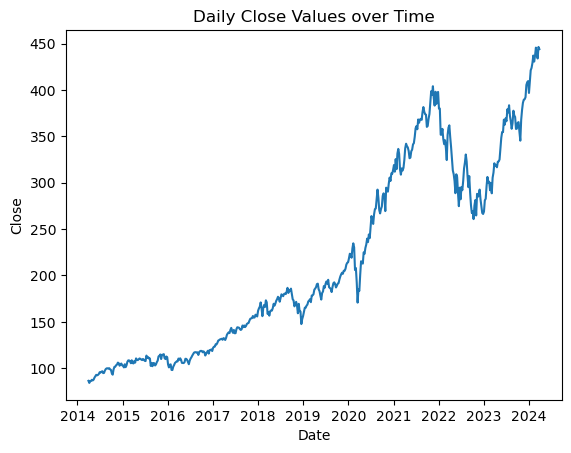

In [23]:
sns.lineplot(data, x='Date', y='Close').set(title='Daily Close Values over Time')

In [24]:
# dropping adjusted close column
data.drop(columns='Adj Close', inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-31,87.730003,89.680000,86.139999,86.370003,268772000
2014-04-07,85.830002,87.879997,83.910004,84.110001,348493700
2014-04-14,84.849998,86.629997,83.279999,86.199997,231822600
2014-04-21,86.400002,88.209999,85.980003,86.190002,192178300
2014-04-28,86.599998,88.150002,85.110001,87.489998,211257300


In [25]:
# getting diff between open and close values for every week
data['Open-Close'] = data.Open - data.Close

# doing a column for the spread between high and low values
data['High-Low'] = data.High - data.Low

# making a new column called 'weekly_return' that is just weekly close to close 
data['weekly_return'] = data['Close'].diff()
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Volume,Open-Close,High-Low,weekly_return
Date,,,,,,,,
2014-04-07,85.830002,87.879997,83.910004,84.110001,348493700,1.720001,3.969994,-2.260002
2014-04-14,84.849998,86.629997,83.279999,86.199997,231822600,-1.349998,3.349998,2.089996
2014-04-21,86.400002,88.209999,85.980003,86.190002,192178300,0.209999,2.229996,-0.009995
2014-04-28,86.599998,88.150002,85.110001,87.489998,211257300,-0.889999,3.040001,1.299995
2014-05-05,86.970001,87.970001,85.529999,86.800003,210750400,0.169998,2.440002,-0.689995


c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Weekly Open-Close Values over Time')]

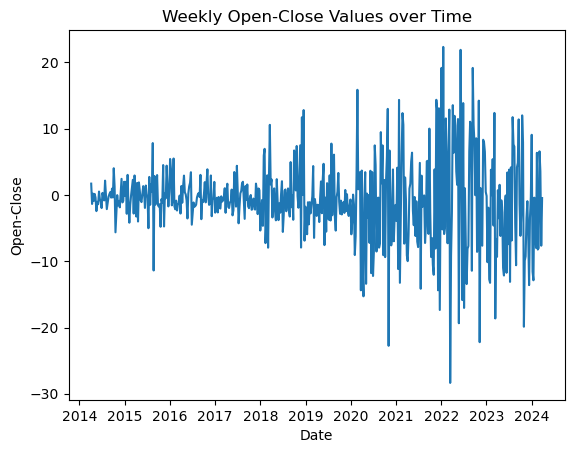

In [26]:
# plotting the open close diff values over time 
sns.lineplot(data, x='Date', y='Open-Close').set(title='Weekly Open-Close Values over Time')

## Doing the Dickey Fuller Test on the close prices

In [27]:
# ad on the raw close vals
ad_fuller = adfuller(data['Close'])
print('AD test on Close values')
print(ad_fuller)

# ad on weekly return 
ad_fuller_weekly = adfuller(data['weekly_return'])
print('AD test on weekly return values')
print(ad_fuller_weekly)

AD test on Close values
(0.366158268293344, 0.9801843041481176, 0, 520, {'1%': -3.4429882202506255, '5%': -2.8671142122781066, '10%': -2.569738849852071}, 3351.3582779523445)
AD test on weekly return values
(-23.767761046731206, 0.0, 0, 520, {'1%': -3.4429882202506255, '5%': -2.8671142122781066, '10%': -2.569738849852071}, 3350.572264569389)


## Dickey-Fuller Test Results Analysis

### Analysis of Close Values (Raw Close Data)

- **ADF Statistic**: 0.366158268293344
  - The ADF statistic is positive, indicating potential non-stationarity.
- **p-value**: 0.9801843041481176
  - A high p-value suggests strong evidence against rejecting the null hypothesis, indicating non-stationarity.
- **Number of Lags Used**: 0
- **Number of Observations Used**: 520
  - The test utilized all available observations.
- **Critical Values**:
  - **1%**: -3.4429882202506255
  - **5%**: -2.8671142122781066
  - **10%**: -2.569738849852071
  - The ADF statistic does not fall below any of the critical values, supporting the non-stationary conclusion.

###  Weekly Return Values

- **ADF Statism**: -23.767761046731206
  - A significantly negative ADF statistic suggests that the time series is stationary.
- **p-value**: 0.0
  - A p-value effectively at zero provides strong evidence for rejecting the null hypothesis of non-stationarity.
- **Number of Lags Used**: 0
- **Number of Observations Used**: 520
  - All observations available were used in this test.
- **Critical Values**:
  - **1%**: -3.4429882202506255
  - **5%**: -2.8671142122781066
  - **10%**: -2.569738849852071
  - The ADF statistic is well below these critical values, affirming that the series is stationary.

### Conclusion

- The raw close values are non-stationary, typical for stock prices which often exhibit trends over time, and this is probably going to be the one that we should do the tests with, because it is able to give some trends to feed the model.
- The weekly return data, however, are stationary, indicating no systematic change over time and consistent fluctuation around a constant mean and variance. This behavior is typical for financial return data, which usually lacks a long-term trend but exhibits volatility clustering.

## Showing the Trend, Seasonality, and Residuals for all of the points

In [34]:
import yfinance as yf

ticker = "QQQ"
qqq = yf.Ticker(ticker)

for key, val in qqq.info.items():
    print(key, val)

longBusinessSummary To maintain the correspondence between the composition and weights of the securities in the trust (the "securities") and the stocks in the NASDAQ-100 Index®, the adviser adjusts the securities from time to time to conform to periodic changes in the identity and/or relative weights of index securities. The composition and weighting of the securities portion of a portfolio deposit are also adjusted to conform to changes in the index.
maxAge 86400
priceHint 2
previousClose 476.72
open 476.52
dayLow 476.05
dayHigh 479.26
regularMarketPreviousClose 476.72
regularMarketOpen 476.52
regularMarketDayLow 476.05
regularMarketDayHigh 479.26
trailingPE 39.074837
volume 23051262
regularMarketVolume 23051262
averageVolume 38148587
averageVolume10days 26468500
averageDailyVolume10Day 26468500
bid 479.13
ask 479.96
bidSize 900
askSize 4200
yield 0.0058
totalAssets 270069170176
fiftyTwoWeekLow 342.35
fiftyTwoWeekHigh 479.26
fiftyDayAverage 444.89
twoHundredDayAverage 410.92725
traili

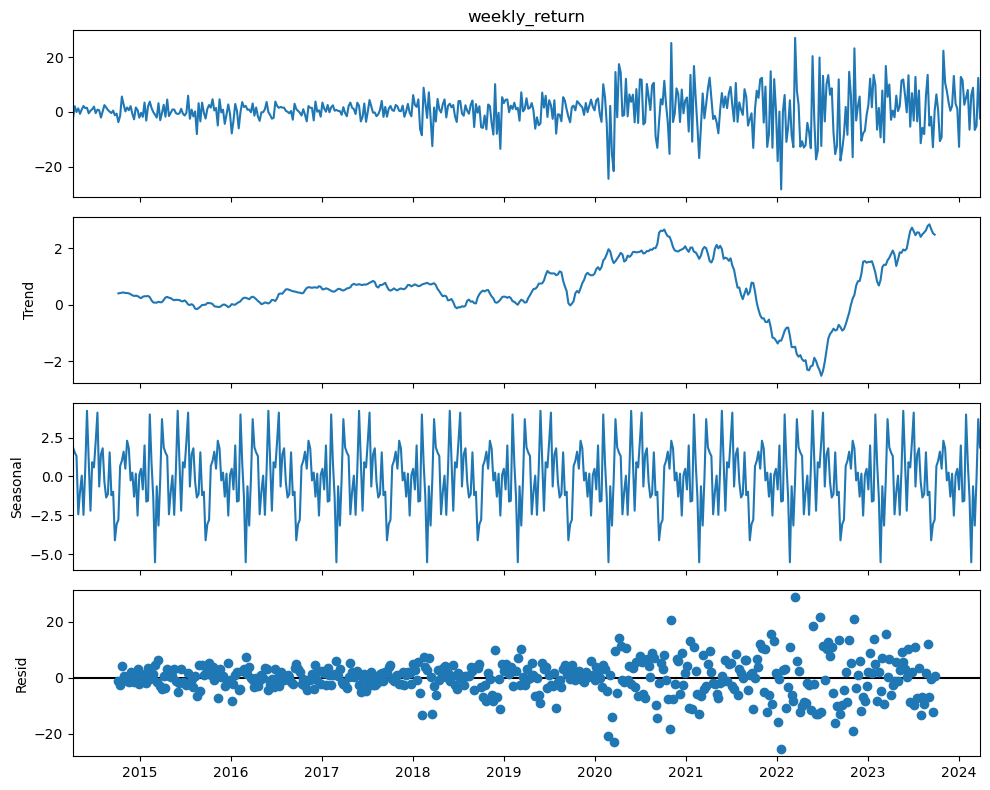

In [35]:
# decomping the data set for the 3 needed components
data['date'] = pd.to_datetime(data.index)
data = data.set_index('date')
data.index.freq = 'W-MON'  

# seasonal decomposition
decomposition = seasonal_decompose(data['weekly_return'], model='additive')

# extracting the trend, seasonal, and residual components
trend = pd.DataFrame(decomposition.trend, index=data.index)
seasonal = pd.DataFrame(decomposition.seasonal, index=data.index)
residual = pd.DataFrame(decomposition.resid, index=data.index)

# plotting
fig = decomposition.plot()
fig.set_size_inches(10, 8)  # Optionally adjust the size of the plot
fig.tight_layout() 

## Now making the ARIMA model

In [41]:
# We are going to exclude the last 13 weeks of data to use as a test set, predicting a quarter ahead
train = data[data.index < '2023-12-31']
test = data[data.index >= '2023-12-31']

# making the model 
armia  = ARIMA(train['Close'], order=(20, 1, 30))

In [42]:
model_fit = armia.fit()
train_predictions = model_fit.predict()

c:\Users\tehwh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
test_predictions = model_fit.forecast(steps=13, alpha=0.05)

c:\Users\tehwh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


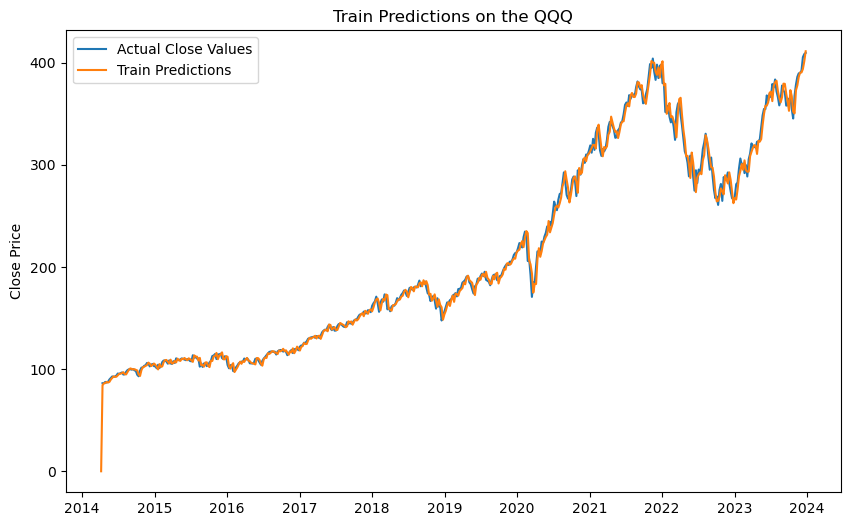

In [45]:
# plotting the predictions along side with the actual values

plt.figure(figsize=(10, 6))
plt.plot(train['Close'][1:], label= "Actual Close Values")
plt.plot(train_predictions, label= "Train Predictions")
plt.title('Train Predictions on the QQQ')
plt.ylabel('Close Price')
plt.legend()

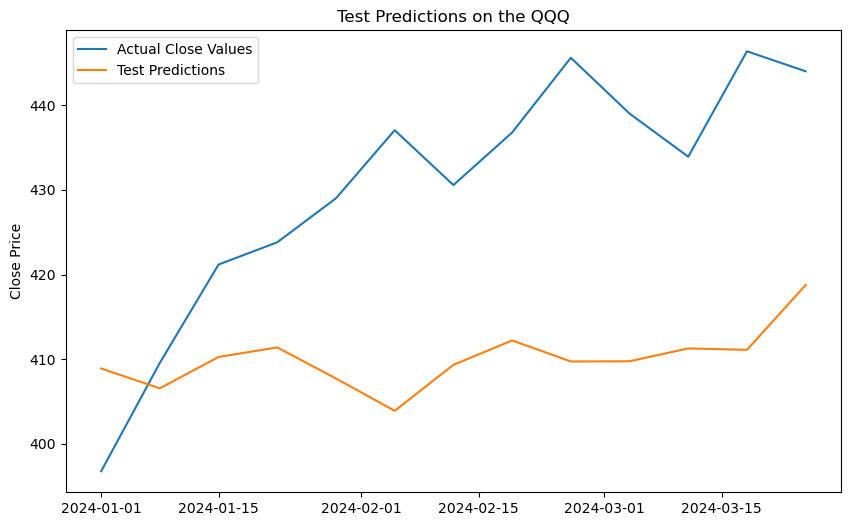

In [46]:
# plotting the test predictions
plt.figure(figsize=(10, 6))
plt.plot(test['Close'], label= "Actual Close Values")
plt.plot(test_predictions, label= "Test Predictions")
plt.title('Test Predictions on the QQQ')
plt.ylabel('Close Price')
plt.legend()


### Conclusion

I know that prediciting the stock market prices are very hard, but there are somethings that Can actually help predict stock market prices. For instance you could build a model that can predict the end of a market cycle based off of setiment data. Large companies like blackrock, dont even use machine learning models, they are now mostly using high frequency trading, for daily trading. But for long term trading, they are using sentiment data to predict the end of a market cycle, `(Also they are market makers so they say when the run is over)`